# UCZENIE MASZYNOWE I DEEP LEARNING - PREZENTACJA FIZYKA UW

## Autor: Mikołaj Sędek, Senior Data Scientist @ Allegro


![pythonML](img/python_ml.jpg)

![numpy](img/numpy.jpg)

![sklearn](img/sklearn.png)

![pandas](img/pandas_logo.png)

![keras_tensorflow](img/keras_tf.jpg)


## 0. Szybka powtórka ze statystyki 

### 0.1. Korelacje
https://en.wikipedia.org/wiki/Correlation_and_dependence

![correlations](img/correlations.png)


### 0.2. Regresja liniowa i logistyczna

![lr_01](img/regression.png)


![lr_05_log](img/logistic.gif)


![lr_02](img/lr_sales.png)

![lr_03_log](img/logistic_reg.jpg)

![lr_04_log](img/log_reg.png)


### 0.3. Drzewa Decyzyjne

![dec_tree](img/dec_tree.jpg)

<br\>
<br\>

![random_forest](img/random_forest.jpg)


<br\>
<br\>
![adaboost](img/adaboost.jpg)

### 0.4. Sieci neuronowe

![nnet](img/nnet.png)

![nnet2](img/nnet2.png)


Porównanie mocy klasyfikatorów na przykładowych danych - problem nieliniowości
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [6]:
import pandas as pd
import itertools

from gensim.models.word2vec import Text8Corpus


import multiprocessing
num_cores = multiprocessing.cpu_count() - 1

from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import FunctionTransformer

from sklearn.utils import resample

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pickle


%matplotlib inline


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

h = .02  # step size in the mesh

names=["Logistic Regression","Decision Tree", "Random Forest", "Neural Net"]

classifiers = [LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1e-5, max_iter=5000)
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable,make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1)
            ]

%matplotlib inline



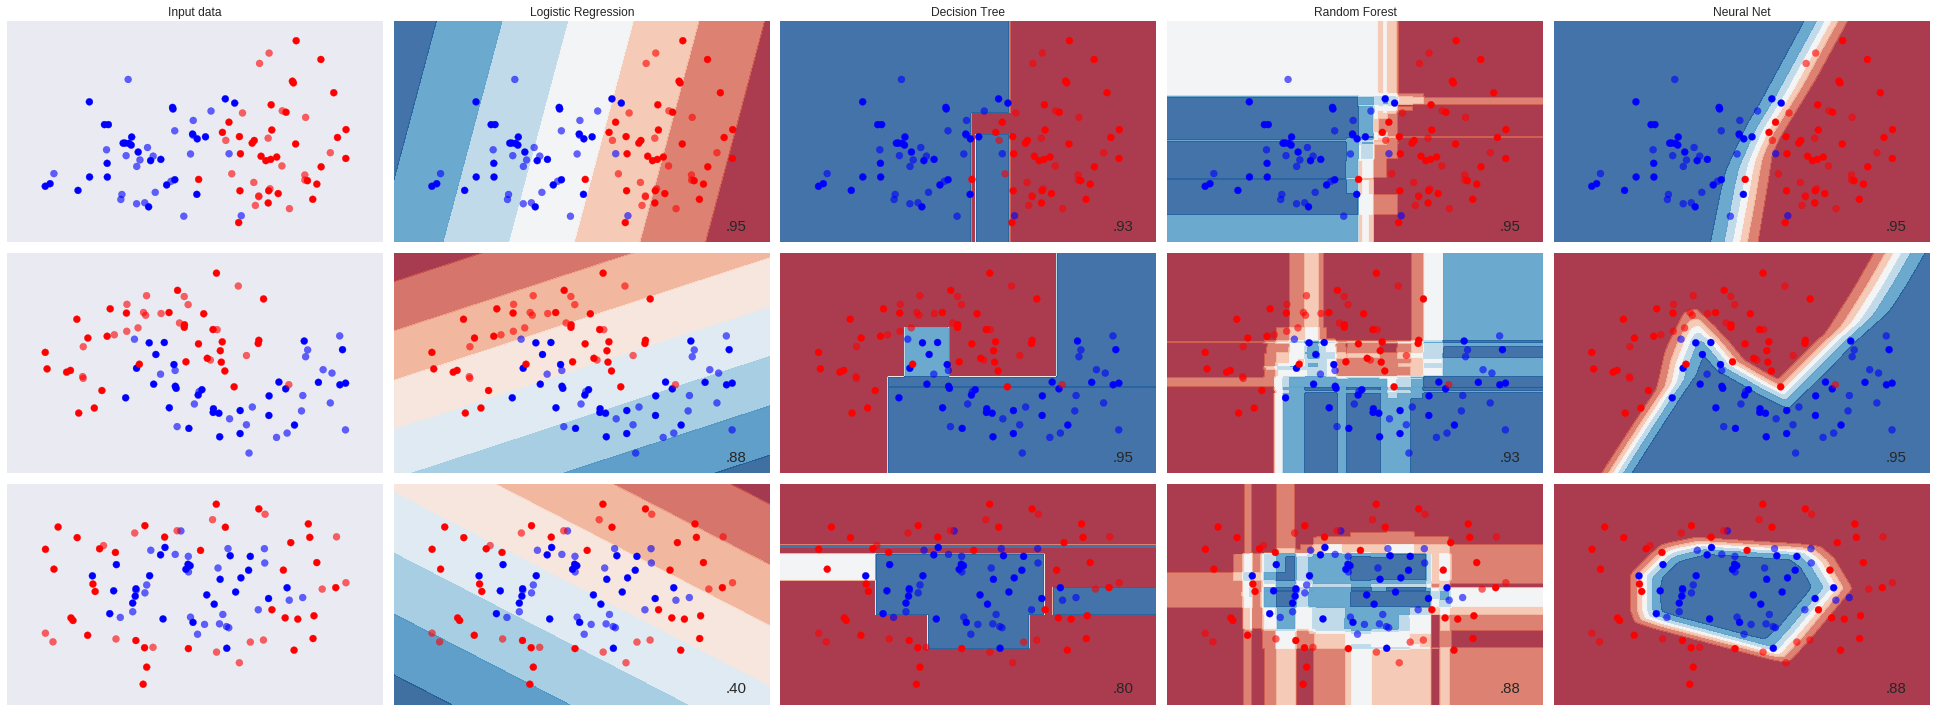

In [8]:

figure = plt.figure(figsize=(27, 10))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## PROSTA SIEĆ NEURONOWA

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [20]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_35 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 25        
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________


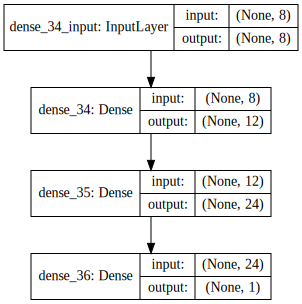

In [21]:
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot

figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)

## SZYBKA WIZUALIZACJA UCZENIA TAKIEJ SIECI :)

## http://playground.tensorflow.org/

In [22]:
# Fit the model
model.fit(X, Y, epochs=30, batch_size=20, verbose=2)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/30
0s - loss: 5.6042 - acc: 0.6510
Epoch 2/30
0s - loss: 5.4336 - acc: 0.6419
Epoch 3/30
0s - loss: 3.2240 - acc: 0.6133
Epoch 4/30
0s - loss: 1.1125 - acc: 0.6302
Epoch 5/30
0s - loss: 0.7444 - acc: 0.6628
Epoch 6/30
0s - loss: 0.7002 - acc: 0.6693
Epoch 7/30
0s - loss: 0.7324 - acc: 0.6458
Epoch 8/30
0s - loss: 0.6504 - acc: 0.6810
Epoch 9/30
0s - loss: 0.6347 - acc: 0.6823
Epoch 10/30
0s - loss: 0.6650 - acc: 0.6693
Epoch 11/30
0s - loss: 0.6736 - acc: 0.6745
Epoch 12/30
0s - loss: 0.6396 - acc: 0.6654
Epoch 13/30
0s - loss: 0.6547 - acc: 0.6706
Epoch 14/30
0s - loss: 0.6169 - acc: 0.7018
Epoch 15/30
0s - loss: 0.6128 - acc: 0.6901
Epoch 16/30
0s - loss: 0.5971 - acc: 0.6992
Epoch 17/30
0s - loss: 0.6025 - acc: 0.6953
Epoch 18/30
0s - loss: 0.6195 - acc: 0.6823
Epoch 19/30
0s - loss: 0.6013 - acc: 0.7005
Epoch 20/30
0s - loss: 0.5867 - acc: 0.7044
Epoch 21/30
0s - loss: 0.5912 - acc: 0.7135
Epoch 22/30
0s - loss: 0.5811 - acc: 0.7148
Epoch 23/30
0s - loss: 0.5979 - acc: 0.70

### MNIST - 60 tys. obrazków przedstawiających ręcznie napisane cyfry - 20x20 px
http://yann.lecun.com/exdb/mnist/

### CIFAR-10 - zbiór 60 tys. obrazków w rozmiarze 32x32 px, 10 kategorii - https://www.cs.toronto.edu/~kriz/cifar.html


prezentowany kod opracowany został przez Jasona Brownlee, Ph.D.:
http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

Pełną dokumentację kodu znajdziecie na stronie http://machinelearningmastery.com i w podręczniku "Deep Learning with Python" (dostępny za opłatą na stronie)

Using TensorFlow backend.


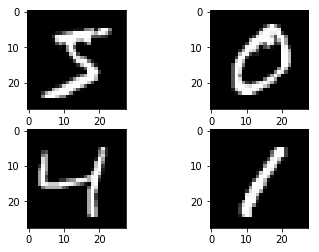

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) 
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray')) 
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray')) 
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()


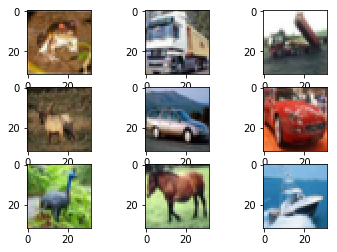

In [2]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train_cf, y_train_cf), (X_test_cf, y_test_cf) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train_cf[i]))
# show the plot
pyplot.show()

aby nauczyć naszą sieć rozpoznawania obrazu skorzystamy z warstw konwolucyjnych = aktywowanych losowo filtrów prostych cech obrazu, skorzystamy też z warstw typu pooling aby wydobyć najsilniejszy sygnał z kolejnych warstw sieci

będziemy chcieli zbudować coś takiego:

![architektura_sieci](img/network_arch.png)



każdy obrazek można przestawić w postaci macierzy wartości, np. natężenie szarości dla obrazka czarno-białego

![obrazek_jako_matrix](img/data_matrix.gif)

jeśli wyobrazimy sobie nasz obrazek jako pewną macierz (np. dla jednego kanału)

![macierz](img/matrix1.png)

i filtr wyglądający następująco

![macierz](img/filter.png)

to tworzenie mapy cech macierzy z wykorzystaniem filtra będzie wyglądała następująco:

![tworzenie_mapy_cech](img/convolution_schematic.gif)

źródło: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/




dla jednego obrazka możemy zbudować wiele map cech korzystając z różnych filtrów

![mapy_cech](img/feature_maps.gif)


aby nie przeuczyć sieci i zredukować liczbę parametrów / ilość informacji przesyłanych do kolejnych warstw korzystamy z tzw. pooling layers, najczęściej jest to maxpooling

![maxpooling](img/maxpool.png)



https://keras.io/optimizers/ <br/>
http://sebastianruder.com/optimizing-gradient-descent/

Modele deep learning potrafią trenować się długo (przez wiele epok) dlatego warto testować różne algorytmy uczenia, które potrafią zapewnić większą prędkość uczenia (learning rate) niż standardowy SGD ze zminimalizowanym ryzykiem przeuczenia bądź wpadnięcia w lokalne minimum

![opt1](img/opt1.gif)

![opt2](img/opt2.gif)



Cały proces trenowania sieci neuronowej z warstwami konwolucji będzie wyglądał następująco:

![deep_model](img/deep_model.png)

Krok1: Inicjujemy filtry i połączenia losowymi wartościami.

Krok2: Sieć bierze mini-batch obrazków i przepuszcza przez losowo aktywowane warstwy, w efekcie wylicza prawdpodobieństwa dla kategorii. Ponieważ wagi inicjowane są losowo to wynik w pierwszym przeliczeniu prawdopodobieńsw też będzie losowy. 

Krok3: Wyliczamy błąd klasyfikacji na wyjściu.

Krok4: Korzystając z algorytmu wstecznej propagacji błędu wyliczane są gradienty błędu w odniesieniu do wszystkich wag w sieci i korzystając z optymalizacyjnej metody największego spadku są modyfikowane w celu zminimalizowania funkcji błędu. 

Wagi są aktulizowane proporcjonalnie do ich siły wpływu na błąd/ 

Parametry takie jak liczba filtrów, wielkości filtrów, topologia sieci nie są zmieniane w trakcie uczenia, jedyne co ulega zmianie to wagi filtrów i połączeń. 

Krok5: Powtórz kroki 2-4 dla wszystkich obrazków x liczba epok 


![keras_tensorflow](img/keras-tensorflow-logo.jpg)

Tensorflow - silnik open source opracowany przez inżynierów Google służący do operacji numerycznych w architekturze grafów przepływu danych (dataflow graphs)

![tensorflow](img/tensorflow-1.png)


Keras - wysokopoziomowe API pozwalające na szybkie prototypowanie głębokich sieci z wykorzystaniem Tensorlow lub Keras (http://keras.io)





# SIEĆ DO ROZPOZNAWANIA RĘCZNIE PISANYCH CYFR - zbiór MNIST

In [23]:
#przygotujmy sieć do rozpoznawania ręcznie pisanych cyfr 

# przygotowanie modułów i danych
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from keras.callbacks import History

K.set_image_dim_ordering('tf')



In [24]:
# ustawienie seed dla generatorów liczb pseudolosowych zadziała poprawnie tylko w przypadku korzystania z CPU
seed = 1
numpy.random.seed(seed)
# ładujemy dane
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
# definiujemy model z warstwami konwolucji i maxpooling
def model_mnist():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))

	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = model_mnist()


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               48128     
__________

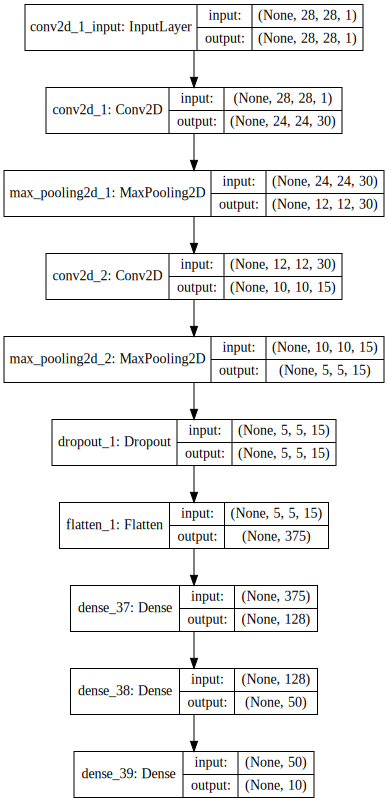

In [28]:
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot

figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)

In [29]:
hist_model = History()

#uczymy model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2, callbacks = [hist_model])
# ewaluacja modelu na zbiorze testowym
scores = model.evaluate(X_test, y_test, verbose=0)
print("Błąd na zbiorze testowym: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.3841 - acc: 0.8807 - val_loss: 0.0842 - val_acc: 0.9748
Epoch 2/10
4s - loss: 0.0997 - acc: 0.9694 - val_loss: 0.0615 - val_acc: 0.9787
Epoch 3/10
4s - loss: 0.0755 - acc: 0.9765 - val_loss: 0.0454 - val_acc: 0.9845
Epoch 4/10
4s - loss: 0.0604 - acc: 0.9812 - val_loss: 0.0379 - val_acc: 0.9870
Epoch 5/10
4s - loss: 0.0523 - acc: 0.9838 - val_loss: 0.0384 - val_acc: 0.9878
Epoch 6/10
4s - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0288 - val_acc: 0.9904
Epoch 7/10
4s - loss: 0.0411 - acc: 0.9870 - val_loss: 0.0268 - val_acc: 0.9917
Epoch 8/10
4s - loss: 0.0377 - acc: 0.9877 - val_loss: 0.0247 - val_acc: 0.9918
Epoch 9/10
4s - loss: 0.0354 - acc: 0.9882 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 10/10
4s - loss: 0.0305 - acc: 0.9895 - val_loss: 0.0250 - val_acc: 0.9921
Błąd na zbiorze testowym: 0.79%


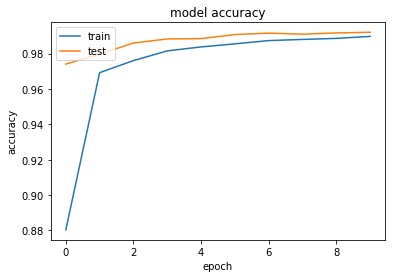

In [14]:
#narysjmy historię uczenia

import matplotlib.pyplot as plt

plt.plot(hist_model.history['acc'])
plt.plot(hist_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.rcParams["figure.figsize"] = (24,16)
plt.show()


Jak wygląda klasyfikacja nowego obrazka dla sieci tego typu (przejście danych przez warstwy konwolucyjne i w pełni połączone):
http://scs.ryerson.ca/~aharley/vis/conv/


# SIEĆ DO ROZPOZNAWANIA OBRAZKÓW- zbiór CIFAR-10

In [ ]:
# to zacznijmy proces uczenia sieci

import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard

K.set_image_dim_ordering('tf')




In [ ]:
# jeśli korzystamy z CPU to można ustawić seed, przy GPU nie ma możliwości na zapewnienie identycznych warunków
seed = 7
numpy.random.seed(seed)
# ładujemy dane
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalizacja wartości
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# kodowanie zmiennych celu
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print("liczba kategorii do predykcji to: "+str(num_classes))


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Definiujemy model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Kompilujemy model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
#zobaczmy graf naszego modelu

print(model.summary())

In [ ]:
from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot

figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)

In [ ]:
# uczenie modelu
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=512, verbose=2)
# wynik modelu na danych testowych
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

## CIEKAWE ARCHITEKTURY - RESNET, INCEPTION, YOLO

### RESNET

![RNN](img/resnet.png)
![RNN](img/resnet2.png)

### INCEPTION

![RNN](img/inception_mem.jpg)

![RNN](img/inception.png)
![RNN](img/inception2.jpg)


![YOLO](img/yolo.png)

# YOLO

## https://pjreddie.com/darknet/yolo/


![YOLO](img/yolo1.jpg)



## implementacja w Keras:
### https://github.com/experiencor/basic-yolo-keras/blob/master/Yolo%20Step-by-Step.ipynb

![car1](img/yolo_img1.png)
![car2](img/yolo_img2.png)
![car3](img/yolo_img3.png)
![car4](img/yolo_img4.png)



# SIEĆ DO ROZPOZNAWANIA TEKSTU- zbiór IMDB

http://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

Sieć z zastosowaniem wartswy "pamięci" (rekurencja): http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![RNN](img/RNN-unrolled.png)

![RNN](img/lstm.jpg)

In [15]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

numpy.random.seed(7)

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

#definicja modelu
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
X_train.shape

(25000, 500)

In [17]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
33s - loss: 0.5895 - acc: 0.6702
Epoch 2/10
33s - loss: 0.3011 - acc: 0.8766
Epoch 3/10
33s - loss: 0.2405 - acc: 0.9085
Epoch 4/10
33s - loss: 0.2034 - acc: 0.9248
Epoch 5/10
33s - loss: 0.1798 - acc: 0.9331
Epoch 6/10
33s - loss: 0.1723 - acc: 0.9374
Epoch 7/10
33s - loss: 0.1448 - acc: 0.9511
Epoch 8/10
33s - loss: 0.1299 - acc: 0.9580
Epoch 9/10
33s - loss: 0.1268 - acc: 0.9565
Epoch 10/10
33s - loss: 0.1218 - acc: 0.9575
Accuracy: 86.86%


### Krótka instrukcja jak odpalić ten notebook na własnym komputerze
Zalecane systemy: Mac OS lub Ubuntu

1. Instalujemy Py 3.6 w dystrybucji Anaconda https://www.continuum.io/downloads lub stawiamy virtual env za pomocą Minicondy
2. Instalujemy keras i tensorflow z konsoli*: pip install keras tensorflow
3. Aby działała wizualizacja sieci (użytkownicy Mac OS mogą użyć brew):
sudo apt-get install graphviz
sudo pip install pydot==1.0.2 --upgrade
4. Wchodzimy do katalogi z notebookiem i wywołujemy Jupytera w konsoli: jupyter notebook

*jeśli mamy komputer z mocną NVidią na pokładzie i chcemy korzystać z GPU zalecam lekturę tego bloga:
http://ksopyla.com/python/tensorflow/instalacja-tensorflow-r0-12-cuda-8-ubuntu-16/



# Zalecana literatura

https://github.com/HFTrader/DeepLearningBook
![deepLearnbook](img/book1.jpg)

![deepLearningPython](img/book2.jpg)

![machineLearningPython](img/book3.jpg)

![tensorflow_cookbook](img/tensorflow_cookbook.jpg)




### fantastyczne notebooki w Jupyter: 
https://github.com/jakevdp/PythonDataScienceHandbook <br\>
https://github.com/leriomaggio/deep-learning-keras-tensorflow <br\>
https://github.com/nfmcclure/tensorflow_cookbook


### polecam te kursy online!!! 
## https://www.coursera.org/specializations/deep-learning
